In [24]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


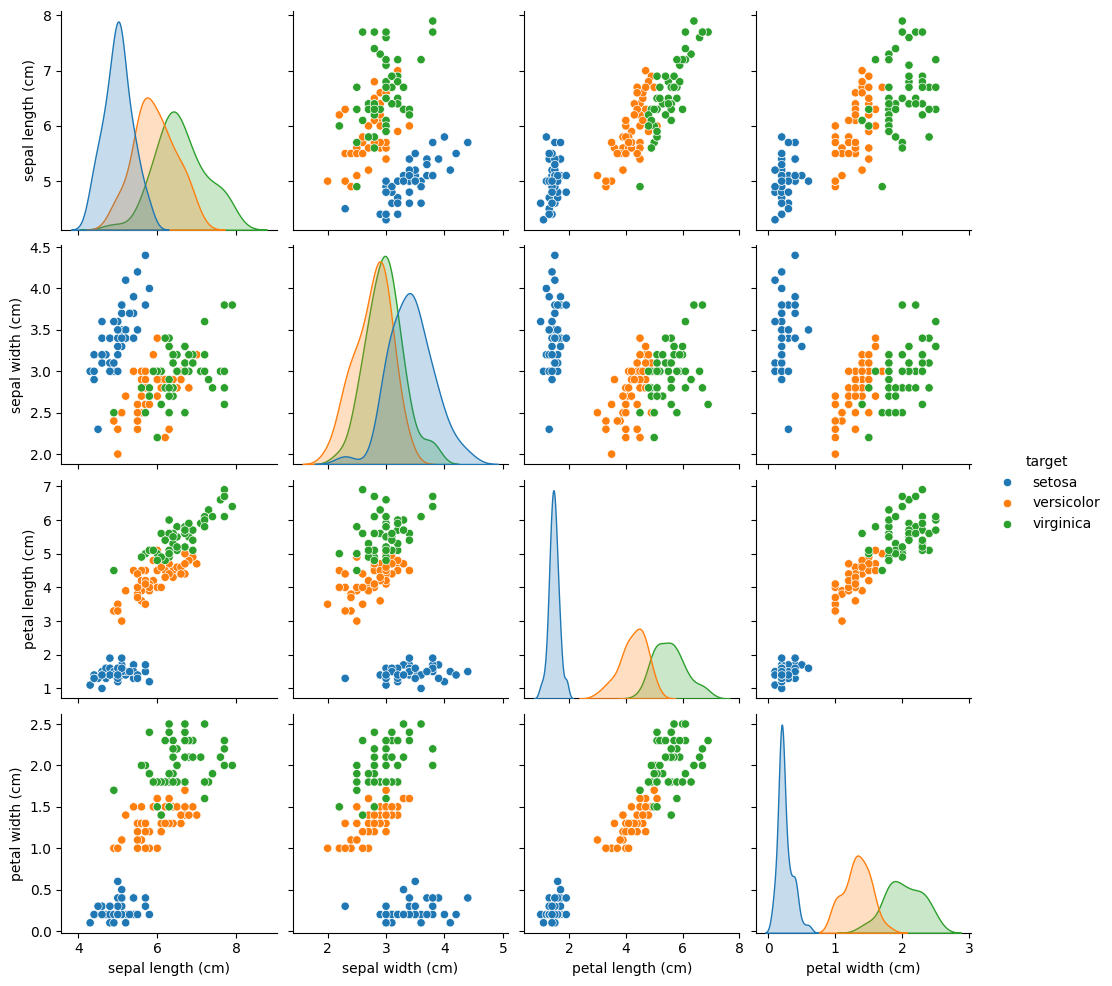

In [2]:
import seaborn as sns

# Rename classes using the iris target names
iris.frame["target"] = iris.target_names[iris.target]
_ = sns.pairplot(iris.frame, hue="target")

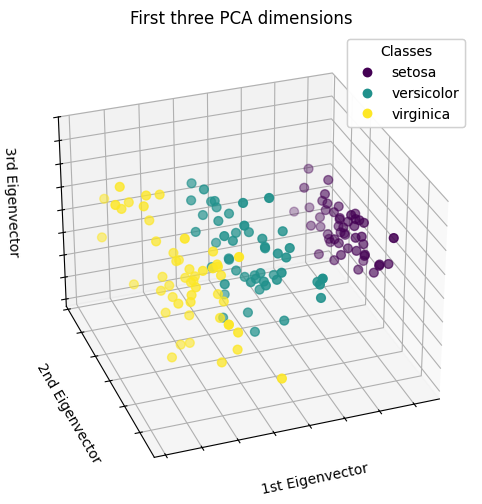

In [10]:
import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
scatter = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set(
    title="First three PCA dimensions",
    xlabel="1st Eigenvector",
    ylabel="2nd Eigenvector",
    zlabel="3rd Eigenvector",
)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

# Add a legend
legend1 = ax.legend(
    scatter.legend_elements()[0],
    iris.target_names.tolist(),
    loc="upper right",
    title="Classes",
)
ax.add_artist(legend1)

plt.show()

In [3]:
df = iris.frame
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
X = df.drop(columns='target')
X.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
import pandas as pd
pd.DataFrame(X_scaled, columns=X.columns).head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [20]:
import numpy as np

class KMeansPerso:
    def __init__(self, n_clusters=3, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def fit(self, X):
        # Initialisation des centroïdes
        np.random.seed(self.random_state)
        indices = np.random.choice(len(X), self.n_clusters, replace=False)
        self.centroids = X[indices]

        for _ in range(self.max_iter):
            # Étape 1 : affectation aux clusters les plus proches
            distances = self._compute_distances(X)
            self.labels_ = np.argmin(distances, axis=1)

            # Étape 2 : mise à jour des centroïdes
            new_centroids = np.array([
                X[self.labels_ == k].mean(axis=0)
                for k in range(self.n_clusters)
            ])

            # Vérifier la convergence
            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

    def _compute_distances(self, X):
        return np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
    
    def predict(self, X):
        distances = self._compute_distances(X)
        return np.argmin(distances, axis=1)



In [22]:
kmp = KMeansPerso(n_clusters=3, random_state=42)
kmp.fit(X_scaled)  # attention : il faut un array numpy

print("Centroïdes trouvés :")
print(kmp.centroids)

print("Étiquettes prédictes :")
print(kmp.labels_)
preds = kmp.predict(X_scaled)
print("Prédictions :", preds[:10])

Centroïdes trouvés :
[[-0.01139555 -0.87600831  0.37707573  0.31115341]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.16743407  0.14530299  1.00302557  1.0300019 ]]
Étiquettes prédictes :
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 0 2 2
 0 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Prédictions : [1 1 1 1 1 1 1 1 1 1]


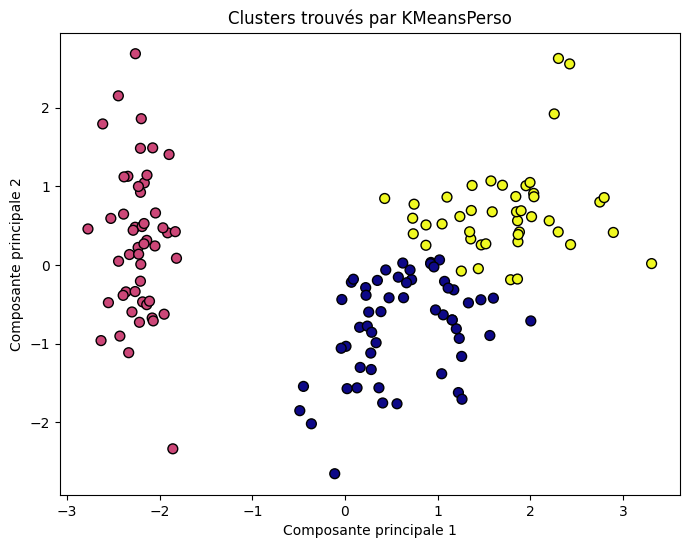

In [23]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Réduction en 2D pour affichage
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Affichage des clusters trouvés par ta classe
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=preds, cmap='plasma', edgecolor='k', s=50)
plt.title("Clusters trouvés par KMeansPerso")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.show()


In [33]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)


KMeans(n_clusters=3)

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


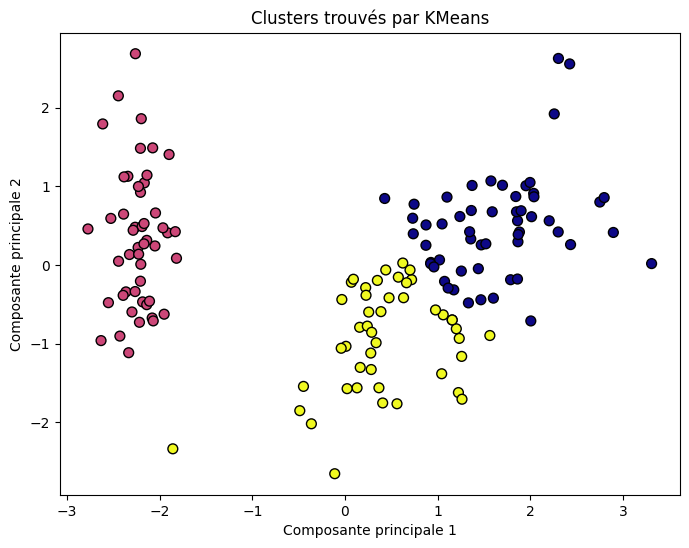

In [34]:
import matplotlib.pyplot as plt
# Récupérer les étiquettes prédites par KMeans
clusters = kmeans.labels_

# Afficher les clusters trouvés par KMeans
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='plasma', edgecolor='k', s=50)
plt.title("Clusters trouvés par KMeans")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.show()


In [35]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, kmeans.labels_)
print(f"Score de silhouette : {score:.2f}")


Score de silhouette : 0.46


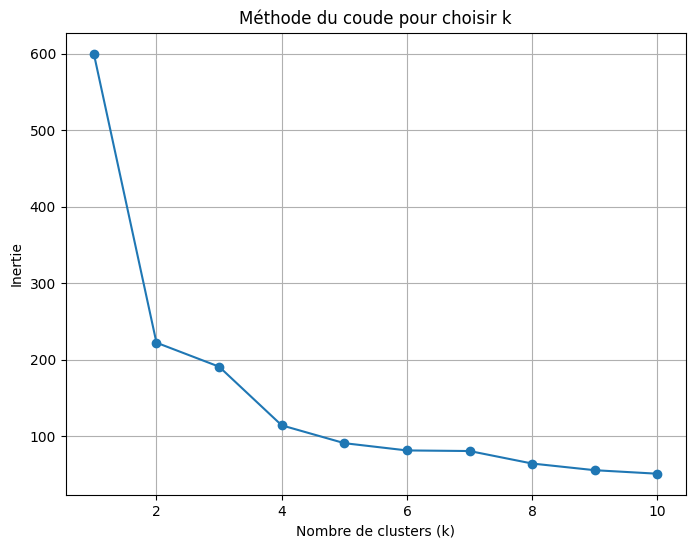

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
k_range = range(1, 11)

for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,6))
plt.plot(k_range, inertias, marker='o')
plt.title("Méthode du coude pour choisir k")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie")
plt.grid(True)
plt.show()


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.stats import mode
import numpy as np

def relabel_clusters(y_true, y_pred):
    labels = np.zeros_like(y_pred)
    for cluster in np.unique(y_pred):
        mask = y_pred == cluster
        labels[mask] = mode(y_true[mask], keepdims=True).mode[0]
    return labels

labels_reordered = relabel_clusters(iris.target.values, kmeans.labels_)

print("Accuracy :", accuracy_score(iris.target, labels_reordered))
print("Confusion matrix :\n", confusion_matrix(iris.target, labels_reordered))


Accuracy : 0.8533333333333334
Confusion matrix :
 [[49  1  0]
 [ 0 37 13]
 [ 0  8 42]]
